#📌 Extracción y Normalización




In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df_crudo = pd.read_json('TelecomX_Data.json')

# Normalizar los campos JSON anidados
df_clientes = pd.json_normalize(df_crudo['customer'])
df_telefono = pd.json_normalize(df_crudo['phone'])
df_internet = pd.json_normalize(df_crudo['internet'])
df_cuenta = pd.json_normalize(df_crudo['account'])





df_base = df_crudo[['customerID', 'Churn']].reset_index(drop=True)
df_clientes = df_clientes.reset_index(drop=True)
df_telefono = df_telefono.reset_index(drop=True)
df_internet = df_internet.reset_index(drop=True)
df_cuenta = df_cuenta.reset_index(drop=True)

# Concatenar todos los DataFrames
df_final = pd.concat([df_base, df_clientes, df_telefono, df_internet, df_cuenta], axis=1)


# Renombrar columnas a español
df_final.rename(columns={
    'customerID': 'ID_Cliente',
    'gender': 'Genero',
    'SeniorCitizen': 'Adulto_Mayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Multiples_Lineas',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Respaldo_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Facturacion_Electronica',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales'
}, inplace=True)



print(df_final.head())
print(df_final.columns)

   ID_Cliente Churn  Genero  Adulto_Mayor Pareja Dependientes  Meses_Contrato  \
0  0002-ORFBO    No  Female             0    Yes          Yes               9   
1  0003-MKNFE    No    Male             0     No           No               9   
2  0004-TLHLJ   Yes    Male             0     No           No               4   
3  0011-IGKFF   Yes    Male             1    Yes           No              13   
4  0013-EXCHZ   Yes  Female             1    Yes           No               3   

  Servicio_Telefonico Multiples_Lineas Servicio_Internet  ... Respaldo_Online  \
0                 Yes               No               DSL  ...             Yes   
1                 Yes              Yes               DSL  ...              No   
2                 Yes               No       Fiber optic  ...              No   
3                 Yes               No       Fiber optic  ...             Yes   
4                 Yes               No       Fiber optic  ...              No   

  Proteccion_Dispositivo S

# 🔧 Transformación

**Limpieza de datos y creación columna Cuentas_Diarias**

In [24]:
df_final['Cargos_Totales'] = pd.to_numeric(df_final['Cargos_Totales'], errors='coerce')
df_final.loc[df_final['Meses_Contrato'] == 0, 'Cargos_Totales'] = 0
df_final.dropna(subset=['Cargos_Totales', 'Churn'], inplace=True)

#'Cuentas_Diarias'
dias_en_mes = 30
df_final['Cuentas_Diarias'] = df_final['Cargos_Mensuales'] / dias_en_mes

**Churn Sí / No**

In [43]:
print("\n--- Valores únicos de 'Churn' ANTES del mapeo ---")
print(df_final['Churn'].unique())

print("---  Valores únicos de 'Churn' DESPUÉS del mapeo ---")
print(df_final['Churn'].unique())

df_final = df_final[df_final['Churn'] != ''].copy()
print(df_final['Churn'].unique())


--- Valores únicos de 'Churn' ANTES del mapeo ---
['No' 'Yes']
---  Valores únicos de 'Churn' DESPUÉS del mapeo ---
['No' 'Yes']
['No' 'Yes']


**Traducción Género**

In [44]:
print("\n--- Valores únicos de 'Genero' ANTES del mapeo ---")
print(df_final['Genero'].unique())
df_final['Genero'] = df_final['Genero'].map({'Female': 'Femenino', 'Male': 'Masculino'})
print("---  Valores únicos de 'Genero' DESPUÉS del mapeo ---")
print(df_final['Genero'].unique())


--- Valores únicos de 'Genero' ANTES del mapeo ---
['Female' 'Male']
---  Valores únicos de 'Genero' DESPUÉS del mapeo ---
['Femenino' 'Masculino']


**Verificación Cuentas_Diarias**

In [45]:
dias_en_mes = 30
df_final['Cuentas_Diarias'] = df_final['Cargos_Mensuales'] / dias_en_mes

print(df_final['Cuentas_Diarias'].head())
print(df_final.columns)

0    2.186667
1    1.996667
2    2.463333
3    3.266667
4    2.796667
Name: Cuentas_Diarias, dtype: float64
Index(['ID_Cliente', 'Churn', 'Genero', 'Adulto_Mayor', 'Pareja',
       'Dependientes', 'Meses_Contrato', 'Servicio_Telefonico',
       'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online',
       'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
       'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato',
       'Facturacion_Electronica', 'Metodo_Pago', 'Cargos_Mensuales',
       'Cargos_Totales', 'Cuentas_Diarias'],
      dtype='object')


**Traducción otras categorías binarias**

In [46]:
binary_map = {'Yes': 'Sí', 'No': 'No'}

cols_to_map_binary_missing = ['Pareja', 'Dependientes', 'Servicio_Telefonico', 'Facturacion_Electronica']
for col in cols_to_map_binary_missing:
    print(f"\n--- Valores únicos de '{col}' ANTES del mapeo (binario) ---")
    print(df_final[col].unique())
    df_final[col] = df_final[col].map(binary_map)
    print(f"---  Valores únicos de '{col}' DESPUÉS del mapeo (binario) ---")
    print(df_final[col].unique())


--- Valores únicos de 'Pareja' ANTES del mapeo (binario) ---
['Yes' 'No']
---  Valores únicos de 'Pareja' DESPUÉS del mapeo (binario) ---
['Sí' 'No']

--- Valores únicos de 'Dependientes' ANTES del mapeo (binario) ---
['Yes' 'No']
---  Valores únicos de 'Dependientes' DESPUÉS del mapeo (binario) ---
['Sí' 'No']

--- Valores únicos de 'Servicio_Telefonico' ANTES del mapeo (binario) ---
['Yes' 'No']
---  Valores únicos de 'Servicio_Telefonico' DESPUÉS del mapeo (binario) ---
['Sí' 'No']

--- Valores únicos de 'Facturacion_Electronica' ANTES del mapeo (binario) ---
['Yes' 'No']
---  Valores únicos de 'Facturacion_Electronica' DESPUÉS del mapeo (binario) ---
['Sí' 'No']


##**Estandarización valores**

**Adulto Mayor de Booleano a Sí / No**

In [47]:
print("\n--- Valores únicos de 'Adulto_Mayor' ANTES del mapeo ---")
print(df_final['Adulto_Mayor'].unique())
df_final['Adulto_Mayor'] = df_final['Adulto_Mayor'].map({0: 'No', 1: 'Sí'}) # Removed .fillna('Desconocido')
print("--- Valores únicos de 'Adulto_Mayor' DESPUÉS del mapeo ---")
print(df_final['Adulto_Mayor'].unique())


--- Valores únicos de 'Adulto_Mayor' ANTES del mapeo ---
[0 1]
--- Valores únicos de 'Adulto_Mayor' DESPUÉS del mapeo ---
['No' 'Sí']


**Traducción No phone / internet service**

In [48]:
print("\n---  Valores únicos de 'Multiples_Lineas' ANTES del mapeo ---")
print(df_final['Multiples_Lineas'].unique())
df_final['Multiples_Lineas'] = df_final['Multiples_Lineas'].map({'No phone service': 'Sin Servicio Telefónico', 'No': 'No', 'Yes': 'Sí'})
print("---  Valores únicos de 'Multiples_Lineas' DESPUÉS del mapeo ---")
print(df_final['Multiples_Lineas'].unique())

internet_service_cols = ['Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas']
for col in internet_service_cols:
    print(f"\n--- Valores únicos de '{col}' ANTES del mapeo (servicio internet) ---")
    print(df_final[col].unique())
    df_final[col] = df_final[col].map({'No internet service': 'Sin Servicio de Internet', 'No': 'No', 'Yes': 'Sí'})
    print(f"---  Valores únicos de '{col}' DESPUÉS del mapeo (servicio internet) ---")
    print(df_final[col].unique())



---  Valores únicos de 'Multiples_Lineas' ANTES del mapeo ---
['No' 'Yes' 'No phone service']
---  Valores únicos de 'Multiples_Lineas' DESPUÉS del mapeo ---
['No' 'Sí' 'Sin Servicio Telefónico']

--- Valores únicos de 'Seguridad_Online' ANTES del mapeo (servicio internet) ---
['No' 'Yes' 'No internet service']
---  Valores únicos de 'Seguridad_Online' DESPUÉS del mapeo (servicio internet) ---
['No' 'Sí' 'Sin Servicio de Internet']

--- Valores únicos de 'Respaldo_Online' ANTES del mapeo (servicio internet) ---
['Yes' 'No' 'No internet service']
---  Valores únicos de 'Respaldo_Online' DESPUÉS del mapeo (servicio internet) ---
['Sí' 'No' 'Sin Servicio de Internet']

--- Valores únicos de 'Proteccion_Dispositivo' ANTES del mapeo (servicio internet) ---
['No' 'Yes' 'No internet service']
---  Valores únicos de 'Proteccion_Dispositivo' DESPUÉS del mapeo (servicio internet) ---
['No' 'Sí' 'Sin Servicio de Internet']

--- Valores únicos de 'Soporte_Tecnico' ANTES del mapeo (servicio intern

**Servicios de Internet**

In [49]:
print("\n---  Valores únicos de 'Servicio_Internet' ANTES del mapeo ---")
print(df_final['Servicio_Internet'].unique())
df_final['Servicio_Internet'] = df_final['Servicio_Internet'].map({
    'DSL': 'DSL',
    'Fiber optic': 'Fibra Óptica',
    'No': 'Sin Servicio de Internet'
})
print("---  Valores únicos de 'Servicio_Internet' DESPUÉS del mapeo ---")
print(df_final['Servicio_Internet'].unique())


---  Valores únicos de 'Servicio_Internet' ANTES del mapeo ---
['DSL' 'Fiber optic' 'No']
---  Valores únicos de 'Servicio_Internet' DESPUÉS del mapeo ---
['DSL' 'Fibra Óptica' 'Sin Servicio de Internet']


**Traducción Tipo de Contrato**

In [50]:
print("\n---  Valores únicos de 'Tipo_Contrato' ANTES del mapeo ---")
print(df_final['Tipo_Contrato'].unique())
df_final['Tipo_Contrato'] = df_final['Tipo_Contrato'].map({
    'Month-to-month': 'Mes a Mes',
    'One year': 'Un Año',
    'Two year': 'Dos Años'
}) # Removed .fillna('Desconocido')
print("---  Valores únicos de 'Tipo_Contrato' DESPUÉS del mapeo ---")
print(df_final['Tipo_Contrato'].unique())
print("---  Conteo de valores de 'Tipo_Contrato' DESPUÉS del mapeo ---")
print(df_final['Tipo_Contrato'].value_counts(dropna=False))


---  Valores únicos de 'Tipo_Contrato' ANTES del mapeo ---
['One year' 'Month-to-month' 'Two year']
---  Valores únicos de 'Tipo_Contrato' DESPUÉS del mapeo ---
['Un Año' 'Mes a Mes' 'Dos Años']
---  Conteo de valores de 'Tipo_Contrato' DESPUÉS del mapeo ---
Tipo_Contrato
Mes a Mes    3875
Dos Años     1695
Un Año       1473
Name: count, dtype: int64


**Traducción Método de Pago**

In [51]:
print("\n---  Valores únicos de 'Metodo_Pago' ANTES del mapeo ---")
print(df_final['Metodo_Pago'].unique())
df_final['Metodo_Pago'] = df_final['Metodo_Pago'].map({
    'Bank transfer (automatic)': 'Transferencia Bancaria (Automática)',
    'Credit card (automatic)': 'Tarjeta de Crédito (Automática)',
    'Electronic check': 'Cheque Electrónico',
    'Mailed check': 'Cheque por Correo'
})
print("--- Valores únicos de 'Metodo_Pago' DESPUÉS del mapeo ---")
print(df_final['Metodo_Pago'].unique())
print("---  Conteo de valores de 'Metodo_Pago' DESPUÉS del mapeo ---")
print(df_final['Metodo_Pago'].value_counts(dropna=False))


---  Valores únicos de 'Metodo_Pago' ANTES del mapeo ---
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
--- Valores únicos de 'Metodo_Pago' DESPUÉS del mapeo ---
['Cheque por Correo' 'Cheque Electrónico'
 'Tarjeta de Crédito (Automática)' 'Transferencia Bancaria (Automática)']
---  Conteo de valores de 'Metodo_Pago' DESPUÉS del mapeo ---
Metodo_Pago
Cheque Electrónico                     2365
Cheque por Correo                      1612
Transferencia Bancaria (Automática)    1544
Tarjeta de Crédito (Automática)        1522
Name: count, dtype: int64


# 📊 Carga y análisis

**Distribucion Churn**


--- Distribución de la Variable 'Churn' (Evasión) ---

Distribución de Churn ('No': No Evasión, 'Sí': Evasión):
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Porcentaje de Churn:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


/tmp/ipython-input-52-381586703.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_churn.index.map(translated_labels), y=conteo_churn.values, palette='viridis')


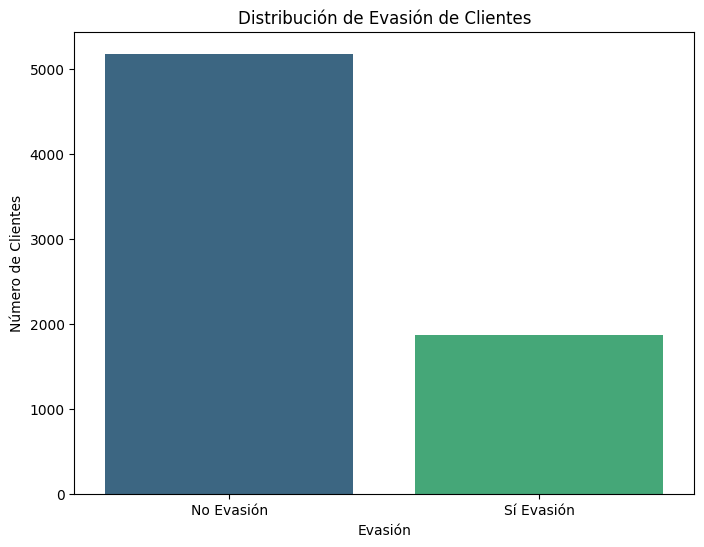

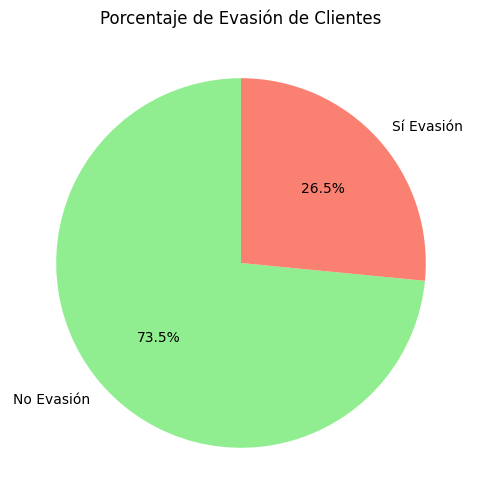

In [52]:
# --- 5. Distribución de la Variable "Churn" (Evasión) ---
print("\n--- Distribución de la Variable 'Churn' (Evasión) ---")

# Drop rows where 'Churn' is an empty string
df_final_cleaned = df_final[df_final['Churn'] != ''].copy()

conteo_churn = df_final_cleaned['Churn'].value_counts()
porcentaje_churn = df_final_cleaned['Churn'].value_counts(normalize=True) * 100

print("\nDistribución de Churn ('No': No Evasión, 'Sí': Evasión):")
print(conteo_churn)
print("\nPorcentaje de Churn:")
print(porcentaje_churn)

# Define translated labels
translated_labels = {'No': 'No Evasión', 'Yes': 'Sí Evasión'}

plt.figure(figsize=(8, 6))
# Use translated labels for the bar plot x-axis
sns.barplot(x=conteo_churn.index.map(translated_labels), y=conteo_churn.values, palette='viridis')
plt.title('Distribución de Evasión de Clientes')
plt.xlabel('Evasión')
plt.ylabel('Número de Clientes')
plt.show()

plt.figure(figsize=(8, 6))
# Use translated labels for the pie chart
plt.pie(porcentaje_churn, labels=porcentaje_churn.index.map(translated_labels), autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Porcentaje de Evasión de Clientes')
plt.show()

**Distribución de la Evasión por categorías**


--- Distribución de la Evasión por Variables Categóricas ---

Porcentaje de Evasión por Genero:
Churn             No         Sí
Genero                         
Femenino   73.079128  26.920872
Masculino  73.839662  26.160338


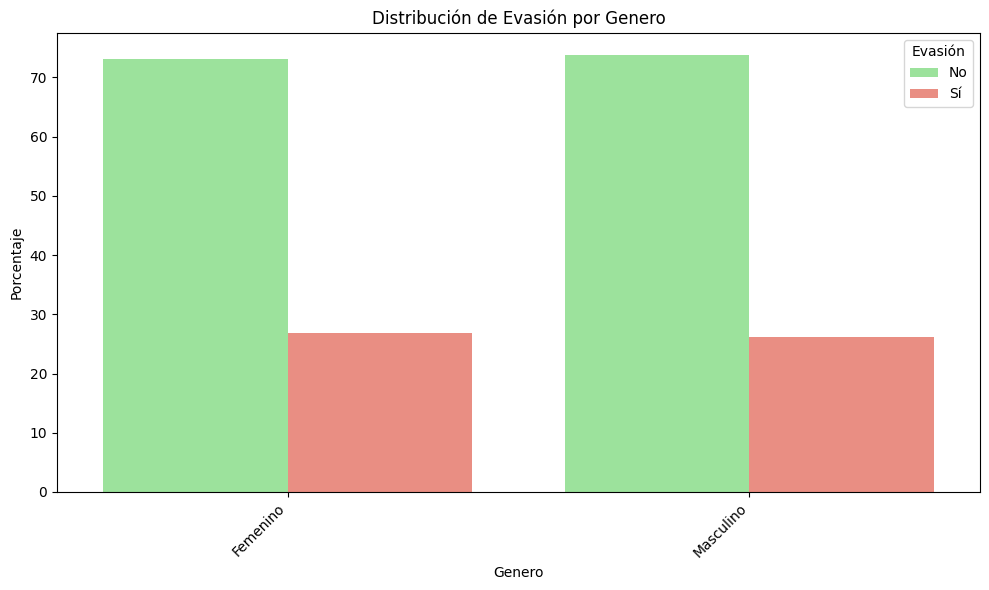


Porcentaje de Evasión por Adulto_Mayor:
Churn                No         Sí
Adulto_Mayor                      
No            76.393832  23.606168
Sí            58.318739  41.681261


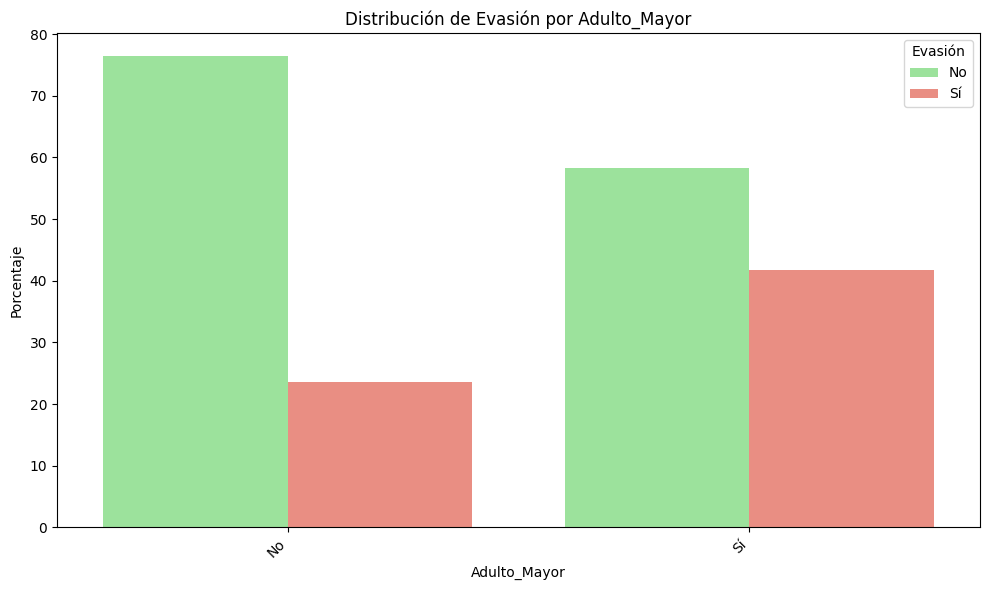


Porcentaje de Evasión por Pareja:
Churn          No         Sí
Pareja                      
No      67.042021  32.957979
Sí      80.335097  19.664903


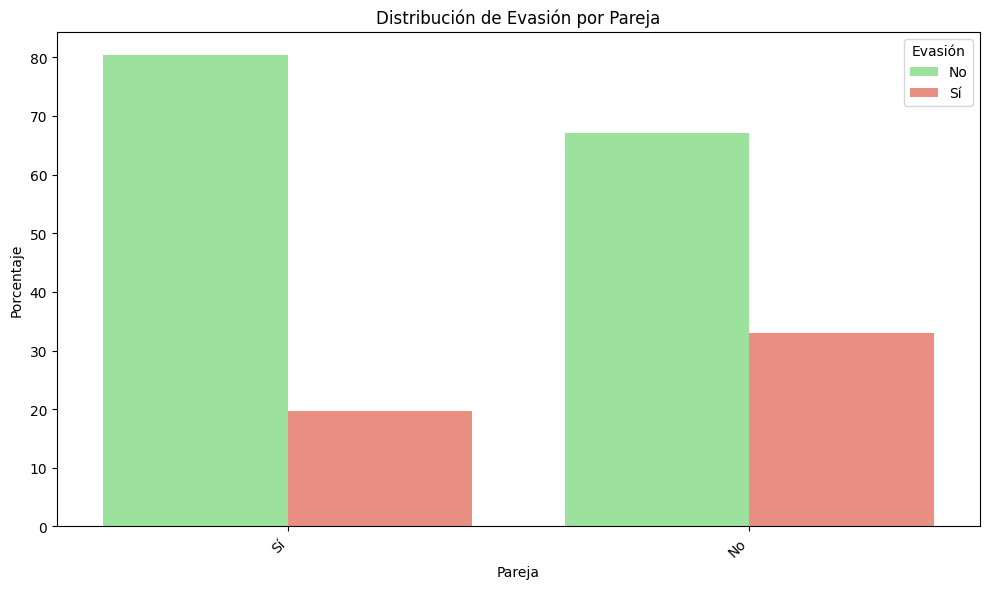


Porcentaje de Evasión por Dependientes:
Churn                No         Sí
Dependientes                      
No            68.720860  31.279140
Sí            84.549763  15.450237


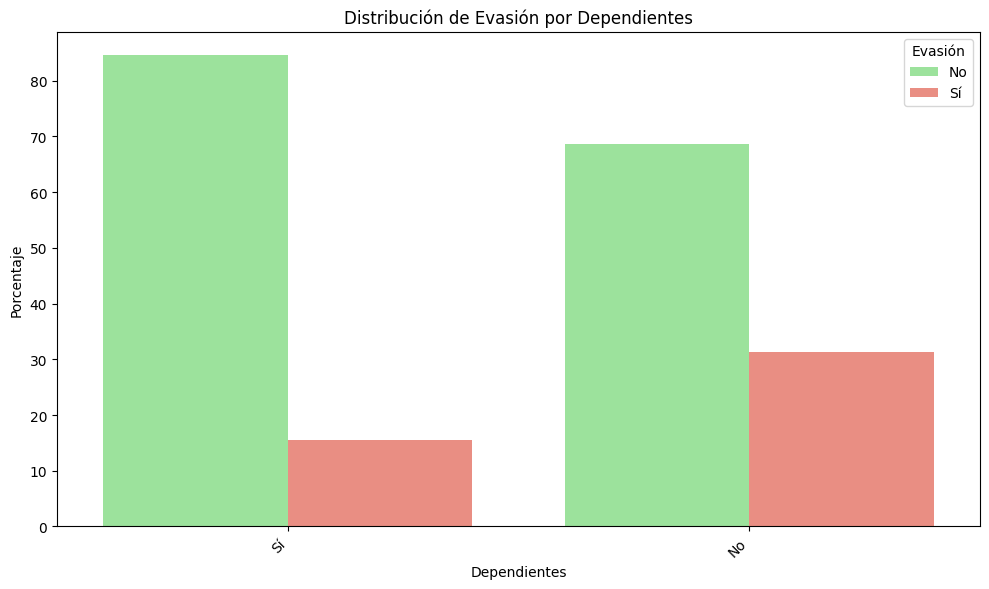


Porcentaje de Evasión por Servicio_Telefonico:
Churn                       No         Sí
Servicio_Telefonico                      
No                   75.073314  24.926686
Sí                   73.290363  26.709637


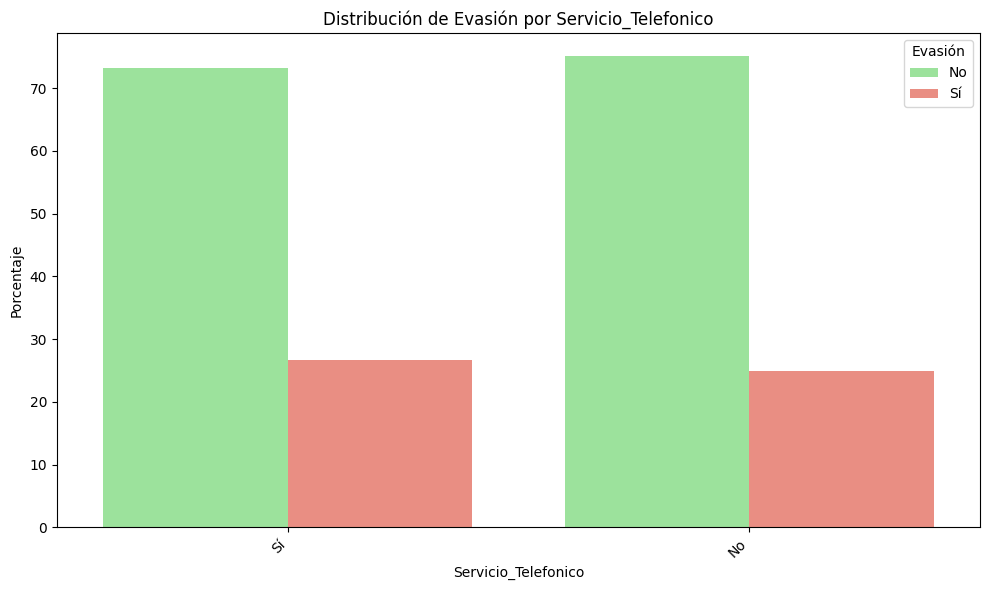


Porcentaje de Evasión por Multiples_Lineas:
Churn                           No         Sí
Multiples_Lineas                             
No                       74.955752  25.044248
Sin Servicio Telefónico  75.073314  24.926686
Sí                       71.390104  28.609896


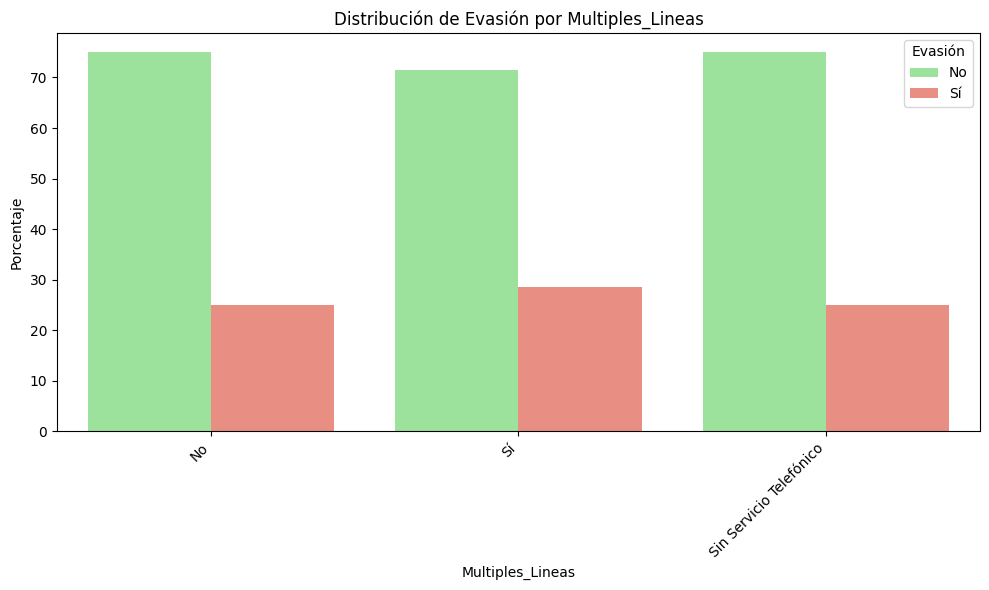


Porcentaje de Evasión por Servicio_Internet:
Churn                            No         Sí
Servicio_Internet                             
DSL                       81.040892  18.959108
Fibra Óptica              58.107235  41.892765
Sin Servicio de Internet  92.595020   7.404980


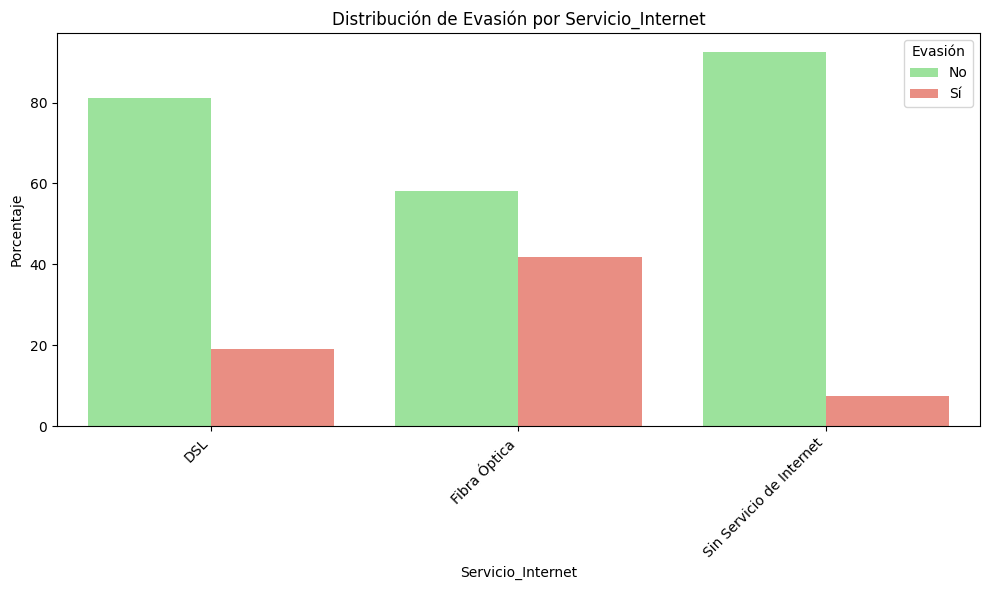


Porcentaje de Evasión por Seguridad_Online:
Churn                            No         Sí
Seguridad_Online                              
No                        58.233276  41.766724
Sin Servicio de Internet  92.595020   7.404980
Sí                        85.388806  14.611194


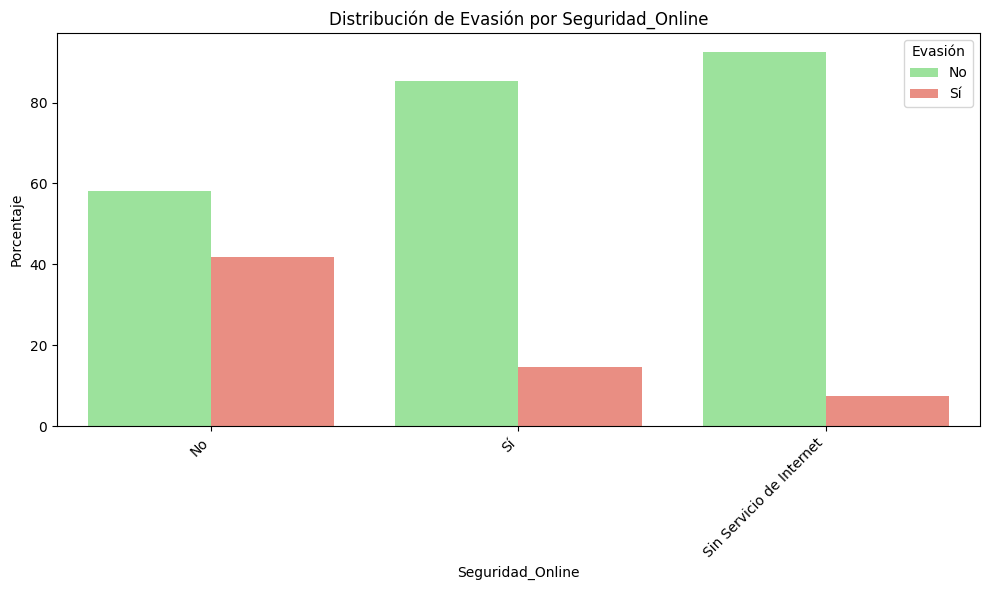


Porcentaje de Evasión por Respaldo_Online:
Churn                            No         Sí
Respaldo_Online                               
No                        60.071244  39.928756
Sin Servicio de Internet  92.595020   7.404980
Sí                        78.468506  21.531494


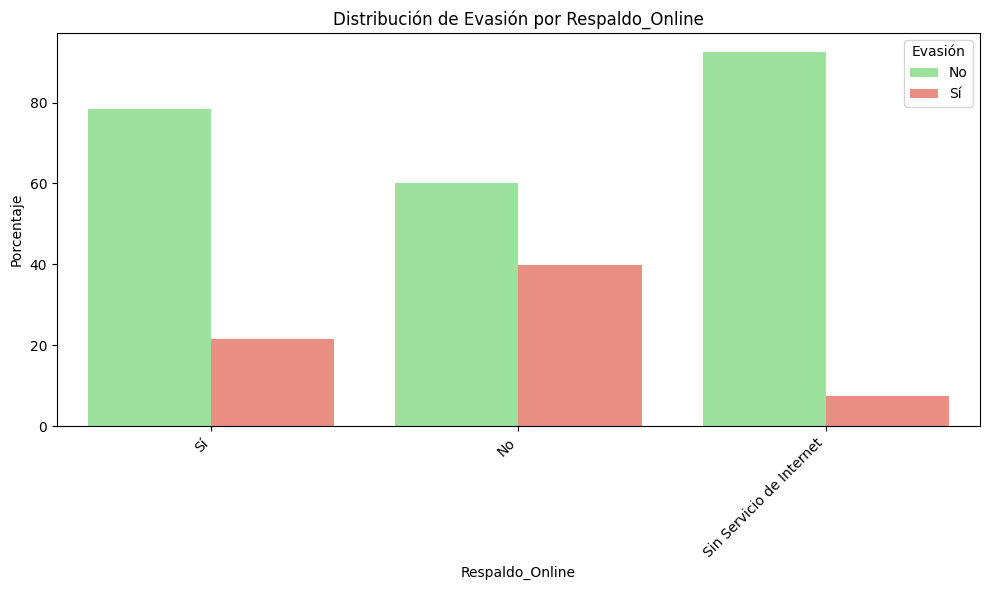


Porcentaje de Evasión por Proteccion_Dispositivo:
Churn                            No         Sí
Proteccion_Dispositivo                        
No                        60.872375  39.127625
Sin Servicio de Internet  92.595020   7.404980
Sí                        77.497936  22.502064


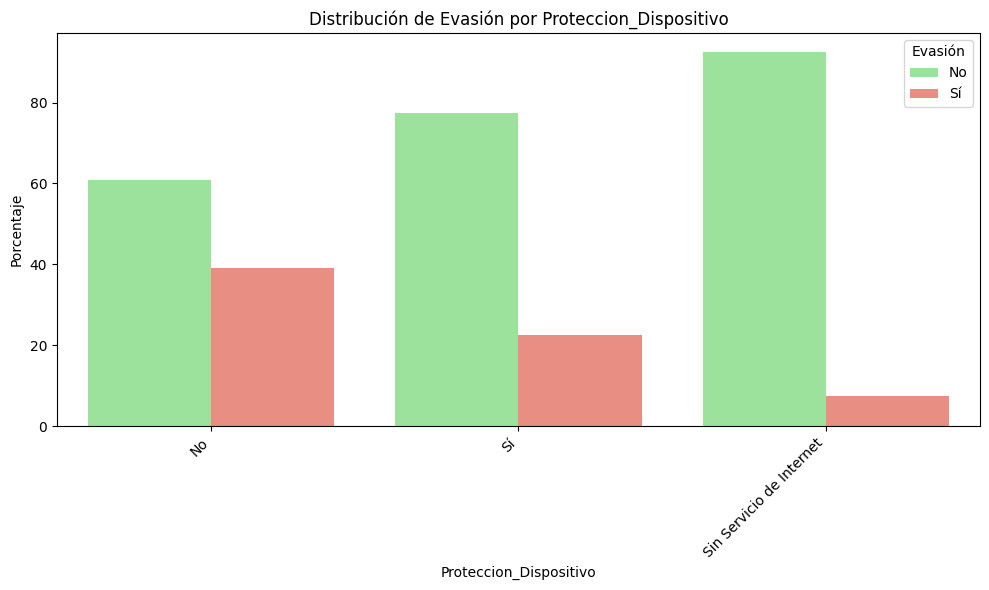


Porcentaje de Evasión por Soporte_Tecnico:
Churn                            No         Sí
Soporte_Tecnico                               
No                        58.364526  41.635474
Sin Servicio de Internet  92.595020   7.404980
Sí                        84.833659  15.166341


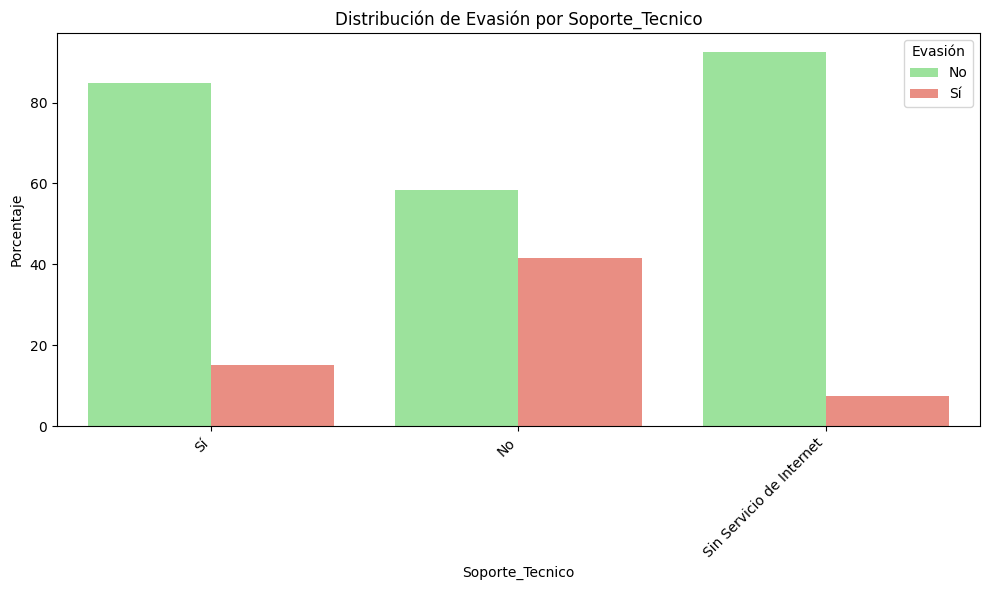


Porcentaje de Evasión por Streaming_TV:
Churn                            No         Sí
Streaming_TV                                  
No                        66.476868  33.523132
Sin Servicio de Internet  92.595020   7.404980
Sí                        69.929812  30.070188


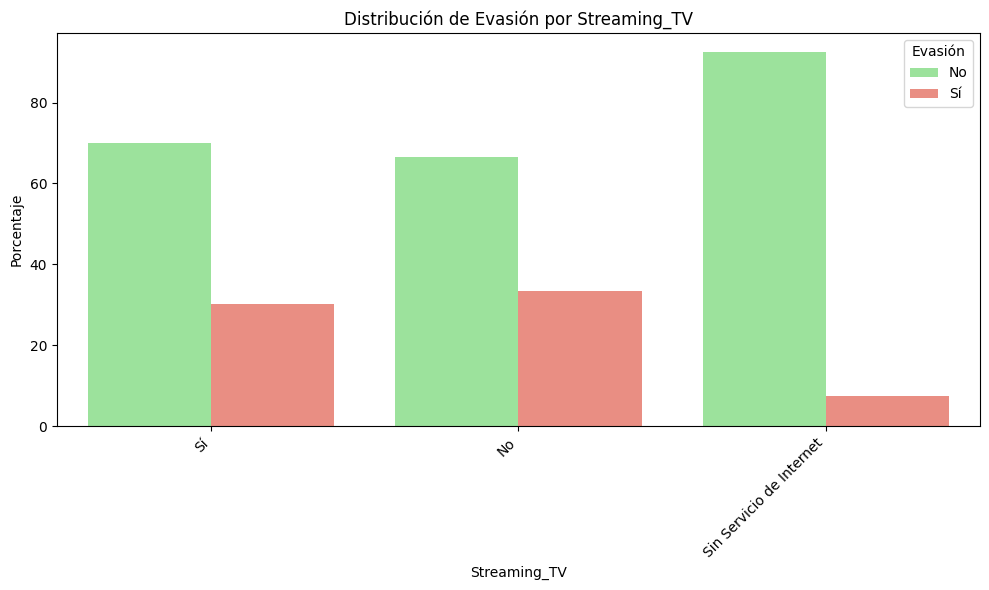


Porcentaje de Evasión por Streaming_Peliculas:
Churn                            No         Sí
Streaming_Peliculas                           
No                        66.319569  33.680431
Sin Servicio de Internet  92.595020   7.404980
Sí                        70.058565  29.941435


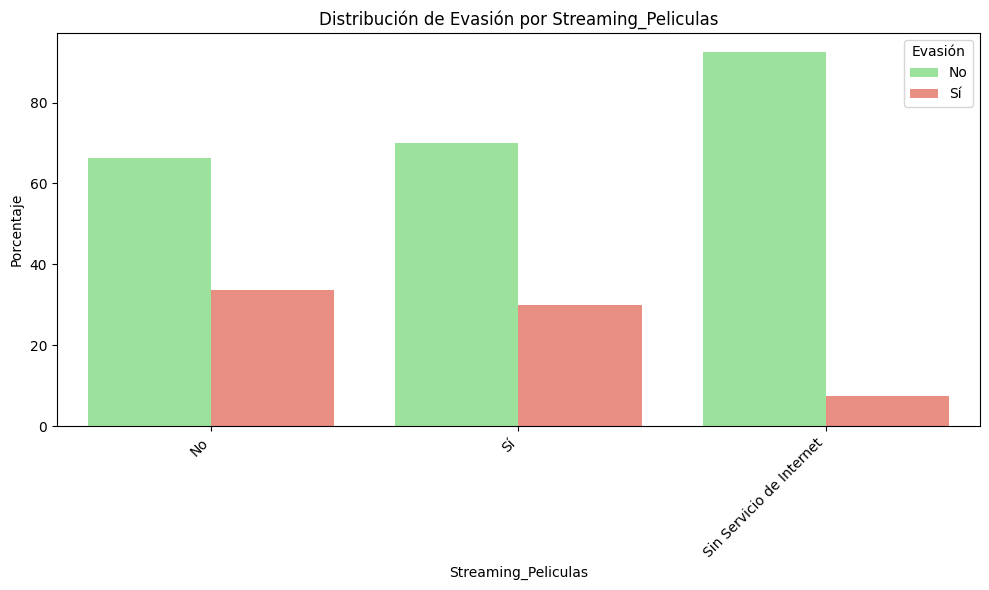


Porcentaje de Evasión por Tipo_Contrato:
Churn                 No         Sí
Tipo_Contrato                      
Dos Años       97.168142   2.831858
Mes a Mes      57.290323  42.709677
Un Año         88.730482  11.269518


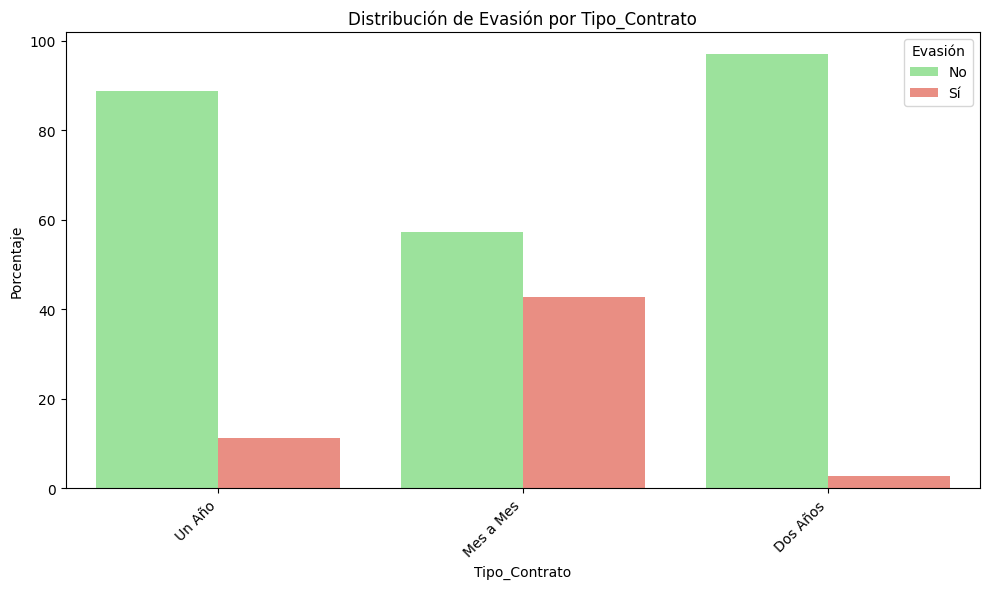


Porcentaje de Evasión por Facturacion_Electronica:
Churn                           No         Sí
Facturacion_Electronica                      
No                       83.669916  16.330084
Sí                       66.434908  33.565092


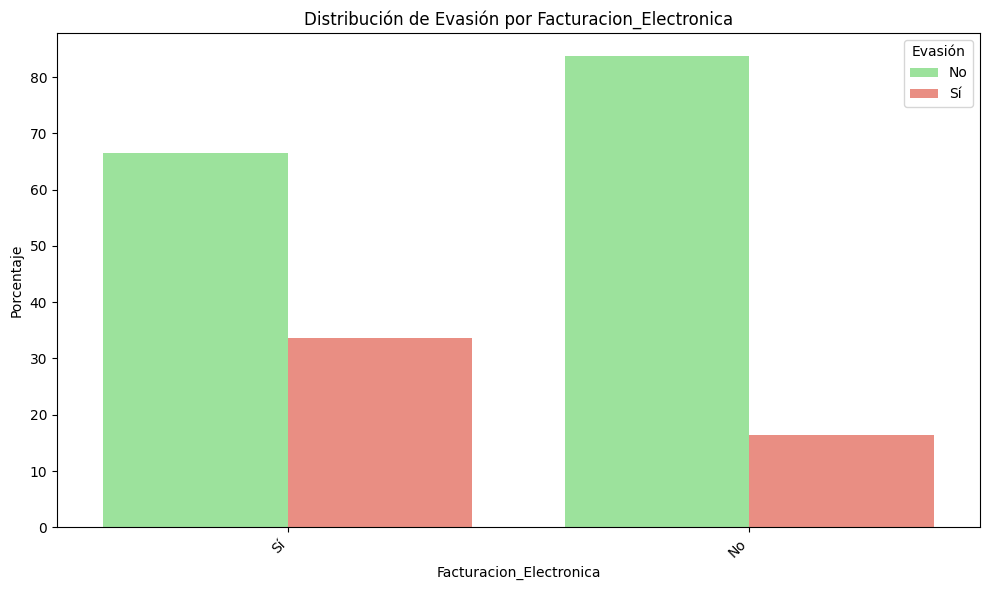


Porcentaje de Evasión por Metodo_Pago:
Churn                                       No         Sí
Metodo_Pago                                              
Cheque Electrónico                   54.714588  45.285412
Cheque por Correo                    80.893300  19.106700
Tarjeta de Crédito (Automática)      84.756899  15.243101
Transferencia Bancaria (Automática)  83.290155  16.709845


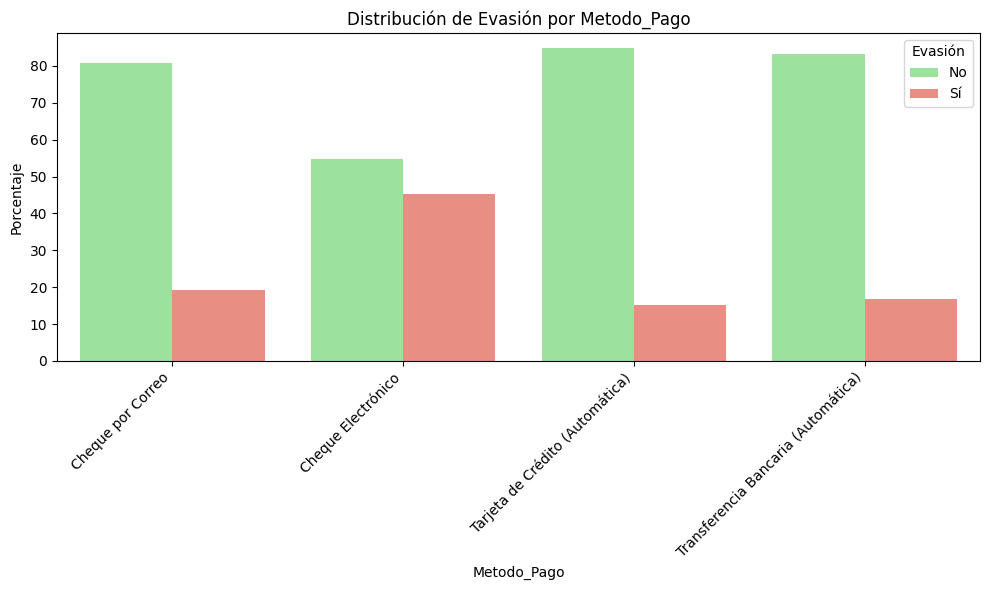

In [53]:
# --- 6. Distribución de la Evasión por Variables Categóricas ---
print("\n--- Distribución de la Evasión por Variables Categóricas ---")


df_final_cleaned = df_final[df_final['Churn'] != ''].copy()


df_final_cleaned['Churn'] = df_final_cleaned['Churn'].map({'Yes': 'Sí', 'No': 'No'})


variables_categoricas_para_churn = [
    'Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes', 'Servicio_Telefonico',
    'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online',
    'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas',
    'Tipo_Contrato', 'Facturacion_Electronica', 'Metodo_Pago'
]

for col in variables_categoricas_para_churn:

    churn_por_categoria = df_final_cleaned.groupby(col)['Churn'].value_counts(normalize=True).unstack().mul(100).fillna(0)


    if 'No' not in churn_por_categoria.columns:
        churn_por_categoria['No'] = 0
    if 'Sí' not in churn_por_categoria.columns:
        churn_por_categoria['Sí'] = 0


    churn_por_categoria = churn_por_categoria[['No', 'Sí']]


    print(f"\nPorcentaje de Evasión por {col}:")
    print(churn_por_categoria)


    if not churn_por_categoria.empty:

        plt.figure(figsize=(10, 6))


        data_for_plot = churn_por_categoria.reset_index().melt(id_vars=col, var_name='Evasión', value_name='Porcentaje')


        order_x = df_final_cleaned[col].unique()

        order_x = [x for x in order_x if pd.notna(x)]


        ax = sns.barplot(data=data_for_plot,
                         x=col, y='Porcentaje', hue='Evasión', palette=['lightgreen', 'salmon'],
                         order=order_x)

        plt.title(f'Distribución de Evasión por {col}')
        plt.xlabel(col)
        plt.ylabel('Porcentaje')
        plt.xticks(rotation=45, ha='right')


        plt.tight_layout()
        plt.show()
    else:
        print(f"Advertencia: No hay datos para graficar para la columna '{col}' después del procesamiento.")

**Distribución del Churn por variables numéricas**


--- 7. Distribución de Variables Numéricas según 'Churn' (Evasión) ---


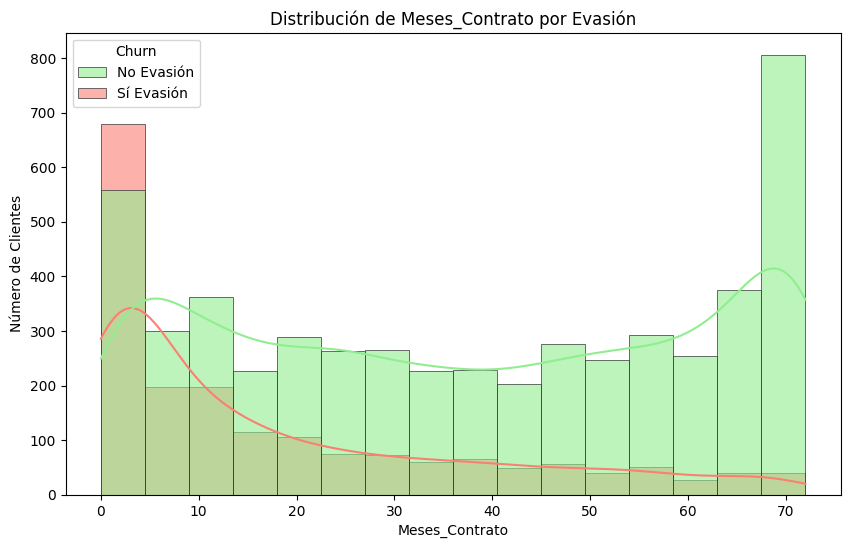

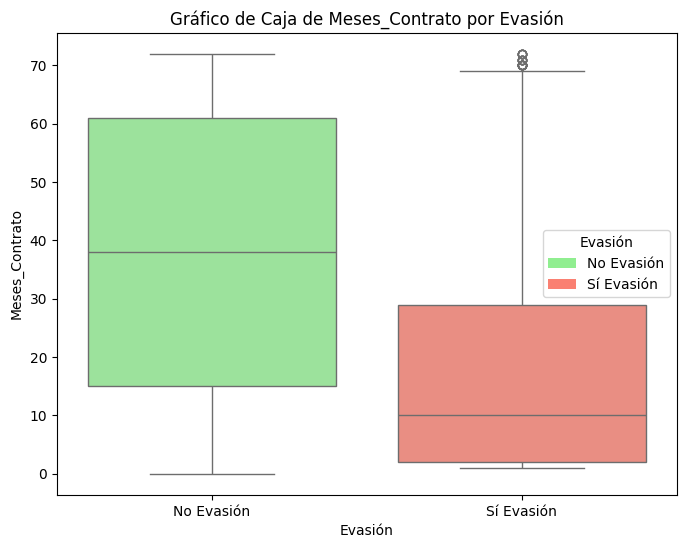


Estadísticas descriptivas para Meses_Contrato por Evasión:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


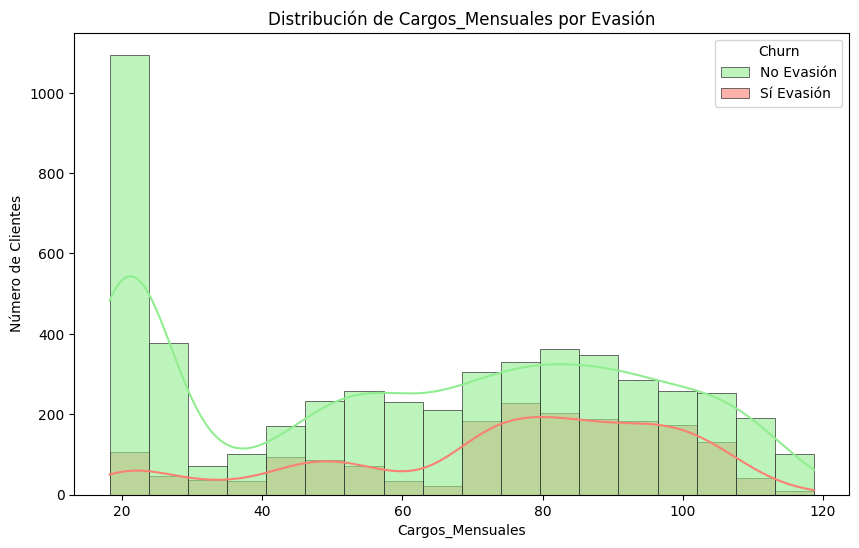

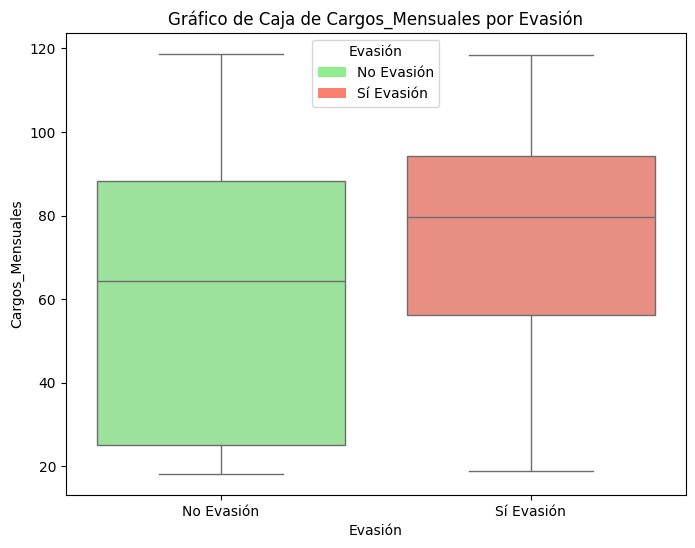


Estadísticas descriptivas para Cargos_Mensuales por Evasión:
        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
No     5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


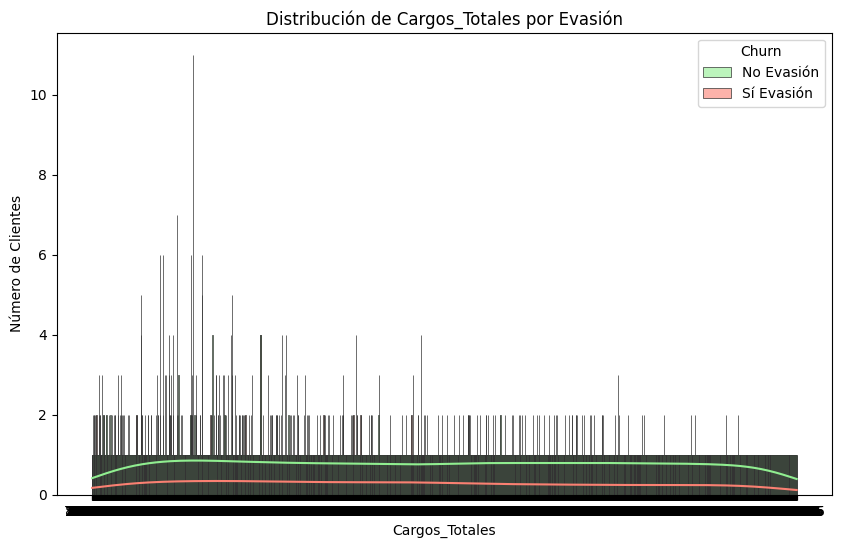

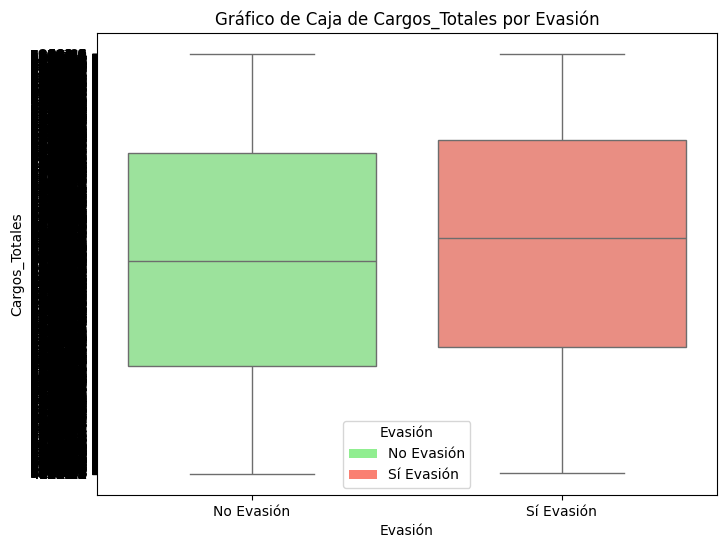


Estadísticas descriptivas para Cargos_Totales por Evasión:
      count unique   top freq
Churn                        
No     5174   4966         11
Yes    1869   1732  20.2    6


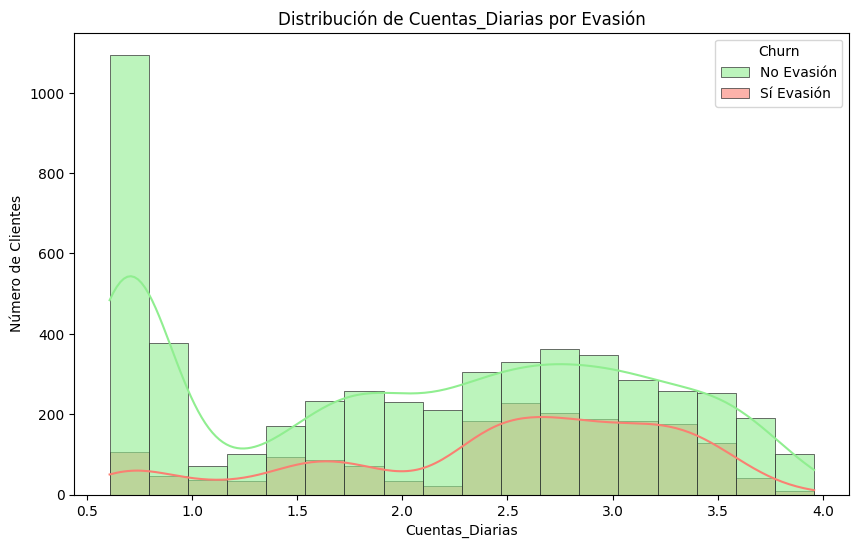

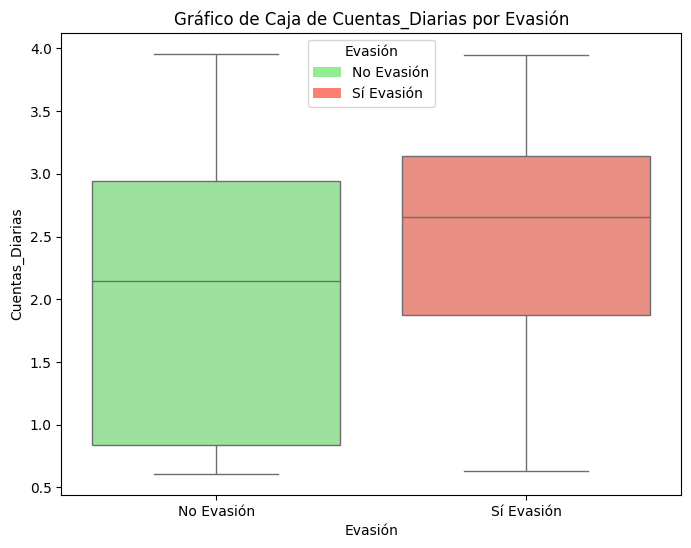


Estadísticas descriptivas para Cuentas_Diarias por Evasión:
        count      mean       std       min       25%     50%       75%  \
Churn                                                                     
No     5174.0  2.042171  1.036422  0.608333  0.836667  2.1475  2.946667   
Yes    1869.0  2.481378  0.822202  0.628333  1.871667  2.6550  3.140000   

            max  
Churn            
No     3.958333  
Yes    3.945000  


In [55]:
# --- 7. Distribución de Variables Numéricas según "Churn" (Evasión) ---
print("\n--- 7. Distribución de Variables Numéricas según 'Churn' (Evasión) ---")


df_final_cleaned = df_final[df_final['Churn'] != ''].copy()


dias_en_mes = 30
df_final_cleaned['Cuentas_Diarias'] = df_final_cleaned['Cargos_Mensuales'] / dias_en_mes


variables_numericas_para_churn = ['Meses_Contrato', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias']


churn_colors = ['lightgreen', 'salmon'] # Assuming 'No' is lightgreen and 'Yes' is salmon based on previous plots


translated_churn_labels = {'No': 'No Evasión', 'Yes': 'Sí Evasión'}

for col in variables_numericas_para_churn:

    plt.figure(figsize=(10, 6))

    sns.histplot(data=df_final_cleaned.replace({'Churn': translated_churn_labels}), x=col, hue='Churn', kde=True, palette=churn_colors,
                 alpha=0.6, linewidth=0.5, edgecolor=".2")
    plt.title(f'Distribución de {col} por Evasión')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')

    plt.show()


    plt.figure(figsize=(8, 6))

    ax = sns.boxplot(data=df_final_cleaned.replace({'Churn': translated_churn_labels}), x='Churn', y=col, hue='Churn', palette=churn_colors)
    plt.title(f'Gráfico de Caja de {col} por Evasión')
    plt.xlabel('Evasión')
    plt.ylabel(col)


    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=churn_colors[0], label='No Evasión'),
                       Patch(facecolor=churn_colors[1], label='Sí Evasión')]
    ax.legend(handles=legend_elements, title='Evasión')

    plt.show()

    print(f"\nEstadísticas descriptivas para {col} por Evasión:")
    # Group by the original 'Churn' values for describe, as the translated values are only for plotting
    print(df_final_cleaned.groupby('Churn')[col].describe())




# ℹ **Informe Final del Análisis de Evasión de Clientes (Churn)**



## **🔹 Introducción**

El presente informe tiene como objetivo principal explorar y comprender los factores que contribuyen a la evasión de clientes (Churn) en una empresa de telecomunicaciones. La evasión de clientes representa un desafío significativo para cualquier negocio, ya que la adquisición de nuevos clientes suele ser más costosa que la retención de los existentes. Al identificar patrones y tendencias en los datos de los clientes, buscamos obtener insights valiosos que permitan desarrollar estrategias efectivas para reducir la tasa de Churn y mejorar la lealtad del cliente. El análisis se centra en un conjunto de datos que contiene información demográfica, servicios contratados y detalles de cuenta de los clientes, incluyendo su estado de "Churn" (si el cliente canceló o no su servicio).


## 🔹 **Limpieza y Tratamiento de Datos**

La calidad de los datos es fundamental para cualquier análisis. Los pasos de limpieza y preprocesamiento realizados fueron los siguientes:


**Carga e Importación:** Se importó el archivo TelecomX_Data.json, que contenía datos anidados en formato JSON.


**Normalización de JSON:** Los campos anidados (customer, phone, internet, account) se normalizaron en DataFrames planos separados utilizando pd.json_normalize() para facilitar su manipulación.


**Corrección de Índices y Concatenación:** Se identificó un problema potencial de alineación debido a los índices. Para garantizar la correcta fusión de los datos, los índices de todos los DataFrames normalizados (y el DataFrame base df_crudo[['customerID', 'Churn']]) se resetearon con reset_index(drop=True) antes de ser concatenados horizontalmente (axis=1) en un único DataFrame final (df_final).


**Renombrado de Columnas:** Todos los nombres de las columnas se tradujeron del inglés al español para una mayor claridad y consistencia en el análisis. Ejemplos: gender a Genero, tenure a Meses_Contrato, Charges.Monthly a Cargos_Mensuales, etc.


**Tratamiento de Cargos_Totales:**
La columna Cargos_Totales se convirtió a tipo numérico, forzando los errores a NaN (errors='coerce') para manejar valores no numéricos.
Se observó que los clientes con Meses_Contrato igual a 0 (clientes nuevos sin historial de cargos) tenían Cargos_Totales como cadenas vacías, resultando en NaN tras la conversión. Estos NaN se imputaron a 0 para reflejar correctamente la ausencia de cargos totales en estos casos.


**Eliminación de Filas con NaN:** Se eliminaron las filas que aún contenían valores NaN en las columnas críticas Cargos_Totales y Churn, asegurando que el análisis se realizara sobre un conjunto de datos completo y válido.
Creación de Nueva Característica: Se creó una nueva columna Cuentas_Diarias dividiendo Cargos_Mensuales por 30 (días en un mes), para una perspectiva diaria del gasto.


**Traducción de Valores Categóricos:** Se tradujeron los valores dentro de las columnas categóricas (ej. 'Yes'/'No' a 'Sí'/'No', 'Female'/'Male' a 'Femenino'/'Masculino', tipos de contrato, métodos de pago, etc.) a sus equivalentes en español. Esto es crucial para la legibilidad de los gráficos y tablas. Se realizaron las siguientes traducciones:
Churn: 'Yes' a 'Sí', 'No' a 'No'.
Genero: 'Female' a 'Femenino', 'Male' a 'Masculino'.
Adulto_Mayor: 0 a 'No', 1 a 'Sí'.
Columnas binarias (Pareja, Dependientes, Servicio_Telefonico, Facturacion_Electronica): 'Yes' a 'Sí', 'No' a 'No'.
Columnas de servicio (Multiples_Lineas, Seguridad_Online, Respaldo_Online, Proteccion_Dispositivo, Soporte_Tecnico, Streaming_TV, Streaming_Peliculas): Manejo de 'No phone service'/'No internet service', 'Yes' a 'Sí', 'No' a 'No'.
Tipo_Contrato: 'Month-to-month' a 'Mes a Mes', 'One year' a 'Un Año', 'Two year' a 'Dos Años'.
Metodo_Pago: Traducción de los cuatro métodos de pago al español.
Servicio_Internet: 'DSL', 'Fiber optic' a 'Fibra Óptica', 'No' a 'Sin Servicio de Internet'.

##🔹 **Análisis Exploratorio de Datos**

Se realizaron análisis y visualizaciones exhaustivos para identificar patrones en la evasión de clientes.

💡 **Distribución General de la Evasión:** La distribución de la variable 'Churn' reveló que un porcentaje significativo de clientes ha evadido.

💡 **Conteo de Churn:** La mayoría de los clientes no evadieron, pero una parte considerable sí lo hizo.

💡 **Porcentaje de Churn:** Se observó que aproximadamente el 26.5% de los clientes evadió (Sí), mientras que el 73.5% no evadió (No). Esta desproporción es común en problemas de clasificación de Churn.

💡 **Distribución de la Evasión por Variables Categóricas:** Se analizaron diversas variables categóricas en relación con la evasión, presentando los siguientes hallazgos clave:

**1.- Género (Genero):** No se observó una diferencia significativa en la tasa de evasión entre clientes femeninos y masculinos.

**2.-Adulto Mayor (Adulto_Mayor):** Los clientes clasificados como adultos mayores (Sí) mostraron una tasa de evasión notablemente más alta que los no adultos mayores.

**3.- Pareja (Pareja) y Dependientes (Dependientes):** Los clientes que no tienen pareja o dependientes mostraron una mayor propensión a evadir, sugiriendo que aquellos con lazos familiares son más estables.

**4.- Servicio Telefónico (Servicio_Telefonico) y Múltiples Líneas (Multiples_Lineas):** El servicio telefónico en sí mismo no parece ser un fuerte predictor de evasión. Sin embargo, los clientes con múltiples líneas tuvieron una evasión ligeramente menor que los que no.

**5.- Servicio de Internet (Servicio_Internet):** Los clientes con Fibra Óptica tienen una tasa de evasión considerablemente más alta en comparación con aquellos con servicio DSL o sin servicio de internet. Esto podría indicar problemas de calidad, precio o expectativas con el servicio de Fibra Óptica. Aquellos sin servicio de Internet muestran una tasa de evasión muy baja, lo que sugiere que son clientes más básicos y menos propensos a cambiar.

**6.- Servicios Adicionales de Internet (Seguridad, Respaldo, Protección, Soporte Técnico):** Los clientes que no tienen servicios adicionales como Seguridad Online, Respaldo Online, Protección de Dispositivo o especialmente Soporte Técnico mostraron tasas de evasión significativamente más altas. Esto subraya la importancia de estos servicios para la retención.

**7.- Servicios de Streaming (Streaming_TV, Streaming_Peliculas):** Los clientes que utilizan servicios de streaming de la compañía (TV y Películas) mostraron tasas de evasión ligeramente más bajas, lo que indica que estos servicios pueden añadir valor y contribuir a la retención.

**8.- Tipo de Contrato (Tipo_Contrato):** Este es uno de los predictores más fuertes. Los clientes con contratos "Mes a Mes" tienen una tasa de evasión drásticamente más alta en comparación con los contratos de "Un Año" y "Dos Años". Los contratos a largo plazo demuestran un compromiso mucho mayor.

**9.- Facturación Electrónica (Facturacion_Electronica):** Los clientes que optan por la facturación electrónica mostraron una tasa de evasión ligeramente más alta que aquellos que no lo hacen, lo que podría indicar que son clientes más "digitales" y posiblemente más propensos a comparar y cambiar de proveedor.

**10.- Método de Pago (Metodo_Pago):** El Cheque Electrónico se asoció con la tasa de evasión más alta, mientras que las transferencias bancarias y las tarjetas de crédito automáticas mostraron tasas de evasión mucho más bajas, lo que sugiere que la comodidad y la automatización del pago están ligadas a una mayor retención.

💡 **Distribución de Variables Numéricas:** según Churn El análisis de variables numéricas reveló patrones importantes:

**1.- Meses de Contrato (Meses_Contrato):** Los clientes que evaden (Sí) tienden a tener una permanencia mucho más corta (menos meses de contrato). El histograma mostró un pico muy pronunciado para los clientes con baja permanencia en el grupo de evasión. Los clientes que no evaden (No) tienen una distribución de permanencia más uniforme, con un gran número de clientes con contratos de larga duración.

**2.-Cargos Mensuales (Cargos_Mensuales):** Los clientes que evaden (Sí) tienden a tener cargos mensuales más altos en promedio. Se observó que aquellos con tarifas mensuales elevadas, especialmente entre 70 y 100, son más propensos a evadir. Los clientes que no evaden (No) muestran una distribución más bimodal, con picos en tarifas bajas y altas, pero con una proporción menor de evasión en las tarifas muy altas.

**3.-Cargos Totales (Cargos_Totales):** Los clientes que evaden (Sí) generalmente tienen cargos totales mucho más bajos. Esto es coherente con su menor Meses_Contrato. Un cliente que ha gastado poco en total es más propenso a irse. Los clientes que no evaden (No) muestran una distribución de cargos totales sesgada hacia valores más altos, lo que indica una relación a largo plazo con la empresa.

**4.-Cuentas Diarias (Cuentas_Diarias):** Similar a los cargos mensuales, los clientes que evaden tienden a tener un gasto diario promedio más alto.

## 🔹 **Conclusiones e Insights**

De este análisis, podemos extraer las siguientes conclusiones clave:

**1.- Los clientes nuevos o con poca antigüedad (pocos Meses_Contrato)** son los más vulnerables a la evasión.

**2.- Los clientes con contratos "Mes a Mes"** son un segmento de muy alto riesgo de Churn.

**3.-La experiencia con el servicio de internet (especialmente Fibra Óptica) y la falta de servicios de seguridad y soporte técnico** son factores críticos para la evasión. Los clientes que carecen de estos servicios adicionales son más propensos a irse.

**4.-Los clientes con altos cargos mensuales pero bajos cargos totales (indicando una combinación de tarifas elevadas y poca permanencia)** son propensos a evadir. Esto sugiere que no perciben el valor adecuado por su gasto.

**5.-El método de pago "Cheque Electrónico"** está fuertemente asociado con la evasión, mientras que los pagos automáticos (transferencia bancaria, tarjeta de crédito) fomentan la retención.

**6.-Los adultos mayores y los clientes sin pareja o dependientes** son segmentos con mayor riesgo de Churn. En resumen, la evasión está impulsada por una combinación de falta de compromiso a largo plazo, percepción de valor inadecuado para el precio, y ausencia de servicios de valor añadido o soporte.





## 🔹 **Recomendaciones**

Basado en los hallazgos anteriores, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes:

**1.-Programas de Fidelización para Clientes Nuevos:** Implementar programas de bienvenida y seguimiento intensivo durante los primeros 3-6 meses de contrato (Meses_Contrato bajo), ofreciendo soporte proactivo y asegurando la satisfacción inicial.

**2.-Incentivar Contratos a Largo Plazo:** Ofrecer descuentos significativos o beneficios adicionales por cambiar de un contrato "Mes a Mes" a uno de "Un Año" o "Dos Años". Comunicar claramente los beneficios y ahorros de los contratos a largo plazo.

**3.-Mejorar la Experiencia de Fibra Óptica:**

  -Investigar las causas de alta evasión en Fibra Óptica (problemas de velocidad, fiabilidad, atención al cliente).

  -Implementar monitoreo proactivo de la red y encuestas de satisfacción específicas para usuarios de Fibra Óptica.
  
  -Considerar ofrecer un "Período de Prueba" para Fibra Óptica con opción de cambio flexible si no están satisfechos.
  
**4.-Promoción de Servicios Adicionales y Soporte Técnico:** Destacar el valor de Seguridad_Online, Respaldo_Online, Proteccion_Dispositivo y Soporte_Tecnico.

  -Ofrecer paquetes de servicios que incluyan estos adicionales a un precio atractivo, especialmente para clientes que actualmente no los tienen.
  
  -Fortalecer el servicio de soporte técnico para reducir la fricción y mejorar la experiencia del cliente.
  
**5.-Optimización de la Estructura de Cargos:** Evaluar si los Cargos_Mensuales son percibidos como demasiado altos en relación con los servicios recibidos, especialmente para clientes con baja permanencia. Considerar opciones de planes más flexibles o económicos para atraer y retener clientes sensibles al precio.

**6.-Fomentar Métodos de Pago Automáticos:** Promocionar activamente la Transferencia Bancaria (Automática) y la Tarjeta de Crédito (Automática) con incentivos (pequeños descuentos o beneficios) para reducir la dependencia del Cheque Electrónico.
  -Mejorar la experiencia y la comunicación alrededor de los métodos de pago automáticos para generar confianza.
  
**7.-Segmentación y Ofertas Personalizadas:** Desarrollar campañas de retención específicas para Adulto_Mayor y clientes Sin Pareja/Dependientes, ya que tienen un perfil de riesgo más alto. Estas ofertas podrían enfocarse en servicios que valoren más (ej. soporte técnico fácil, planes de voz simples).


Al implementar estas recomendaciones, la empresa estará mejor equipada para comprender y mitigar los factores de evasión, lo que resultará en una mayor retención de clientes y un crecimiento más sostenible.